# 1. 문제를 정의하고 큰 그림을 그립니다.

# 2. 데이터를 수집합니다.

## 2-1. 데이터 다운로드

In [1]:
import pandas as pd
housing = pd.read_csv('/home/hogang/workspace/python/Hands-On/datasets/housing.csv')

## 2-2. 데이터 구조 훑어보기

In [2]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


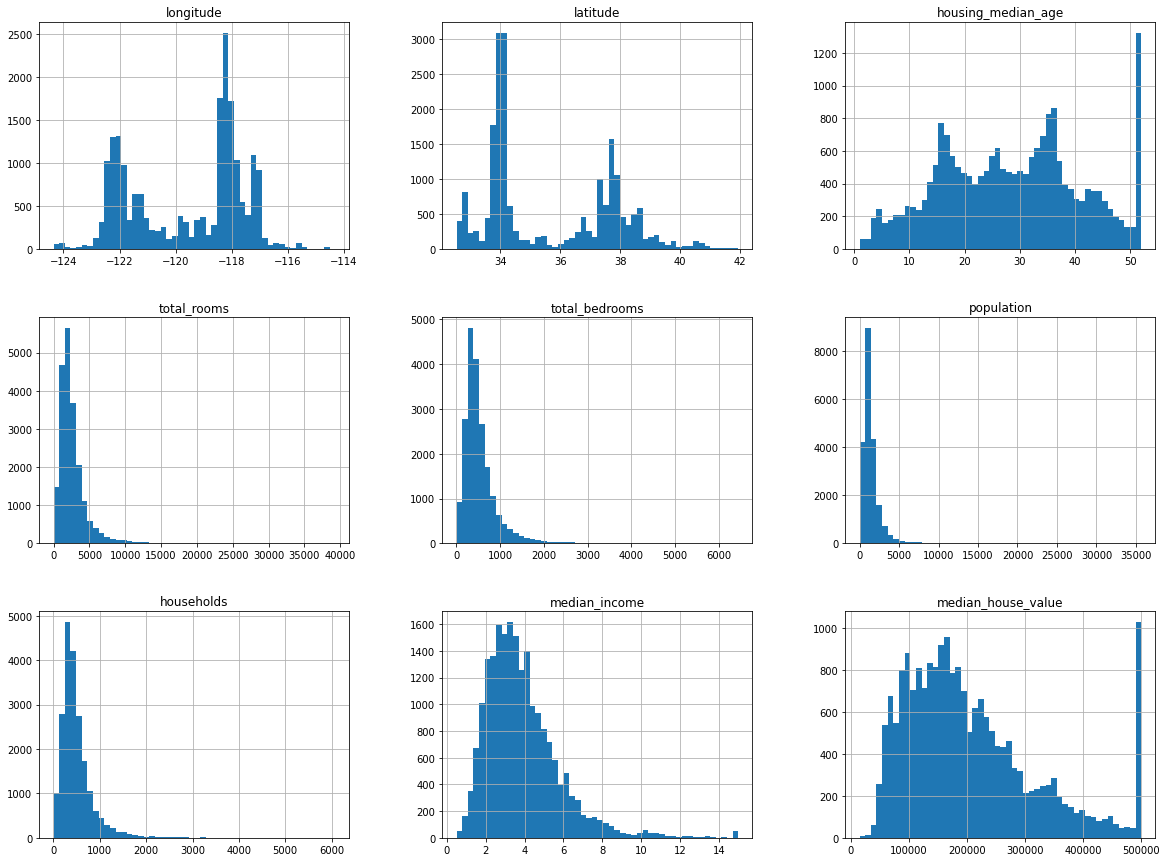

In [5]:
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize=(20,15))
plt.show()

<AxesSubplot:>

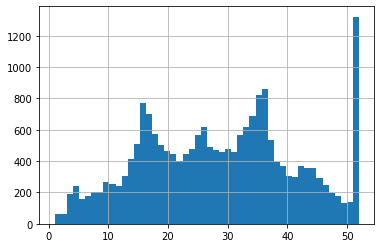

In [6]:
housing["housing_median_age"].hist(bins = 50)

## 2-3. 테스트 세트 만들기

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

In [8]:
import numpy as np
# median_income에 대해서 계층별 샘플링을 하기 위해 새로운 파생변수를 추가한다. (연속형 -> 범주형)
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.,1.5,3.0,4.5,6.,np.inf], labels = [1,2,3,4,5])

<AxesSubplot:>

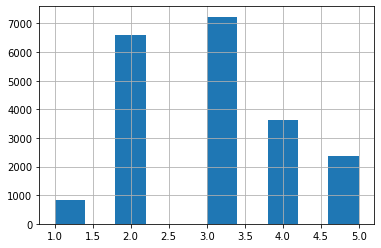

In [9]:
housing["income_cat"].hist()

In [10]:
housing.iloc[:,:-1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit

###StratifiedShuffleSplit는 계층별로 랜덤하게 샘플링하는 것으로 교차분석과 혼동하지 말 것!

# split객체(StratifiedShuffleSplit, ShuffleSplit)는 무조건 트레인셋과 테스트셋 두 덩어리로 나누는 것이고, 
# n_splits 매개변수는 그런 식으로 몇번 뽑을 건지를 의미하는 것이다.
# train_size와 test_size의 합을 전체(1)와 다르게 함으로써 부분 샘플링도 가능하다. 

# KFold객체는 꼭 2개가 아니라 여러개의 폴드로 나누는 행위를 하는 객체로, n_splits 매개변수는 폴드의 수이다.
# 참고로 교차 검증을 위한 함수는 cross_val_score이지 KFold 객체 자체가 아니다.

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    # split 객체의 split 메소드
    # split(X, y) : X는 분할할 데이터 셋(2차원 어레이)이고, y는 계층별로 split하기 위한 기준이 되는 피쳐이다. 
    # 트레인셋과 테스트 셋에 있는 관측치들의 인덱스 값을 반환한다. 
    print(train_index, test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

[17606 18632 14650 ... 13908 11159 15775] [ 5241 10970 20351 ...  4019 12107  2398]


In [12]:
# 계층 샘플링을 했기 때문에 테스트 셋과 트레인 셋에서 각 카테고리의 비율끼리 같은 것을 확인할 수 있다.
print(len(strat_test_set))
print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))
print(strat_train_set['income_cat'].value_counts() / len(strat_train_set))

print(housing['income_cat'].value_counts() / len(housing))

4128
3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64
3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [13]:
# # 랜덤 샘플링으로만 할 경우 카데고리 비율의 차이가 더 크게 나는 것을 확인할 수 있다. 
# split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(housing.iloc[:,:-1], housing["income_cat"]):
#     # split 객체의 split 메소드는 트레인셋과 테스트 셋에 있는 관측치들의 인덱스 값을 반환한다. 
#     print(train_index, test_index)
#     strat_train_set = housing.loc[train_index]
#     strat_test_set = housing.loc[test_index]

# print(len(strat_test_set))
# print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))
# print(strat_train_set['income_cat'].value_counts() / len(strat_train_set))

In [14]:
# income_cat는 계층별 샘플링을 하기 위해 필요했던 파생변수였으므로 다시 없앤다. 
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 3. 데이터 이해를 위한 탐색(시각화) 

In [15]:
# 훈련세트에 대해서만 탐색을 하겠습니다. (이때 데이터가 너무 크면 일부만 샘플링해서 탐색을 할 수도 있습니다.)
# 훈련 세트를 손상시키지 않기 위해 복사본을 만들어 사용합니다.
housing_train_cp = strat_train_set.copy()

## 3-1. 지리적 데이터 시각화 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

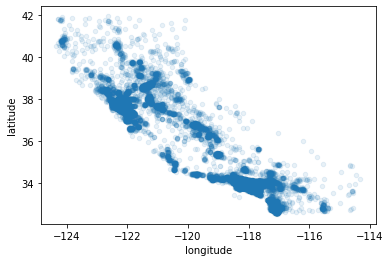

In [16]:
housing_train_cp.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

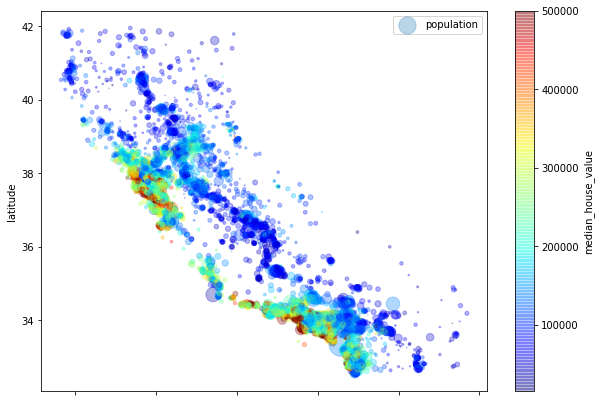

In [17]:
housing_train_cp.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3, s=housing_train_cp["population"]/60, 
             label="population", figsize=(10,7),c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

# 그림을 통해 주택 가격은 바다에 인접한 지역일 수록, 인구 밀도가 높은 지역일 수록 비싼 경향을 보인다는 것을 짐작할 수 있다.  

## 3-2. 피쳐 간 상관관계 조사

In [18]:
# 1. 데이터 특성과 관측치가 엄청 많지는 않으므로 모든 특성간의 표준 상관 계수(피어슨의 r)을 corr() 메서드를 이용해 보자. 
corr_matrix = housing_train_cp.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [19]:
# 예측 대상인 median_house_value 특성에 대해서 다른 피쳐들간의 상관관계를 보자. 
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

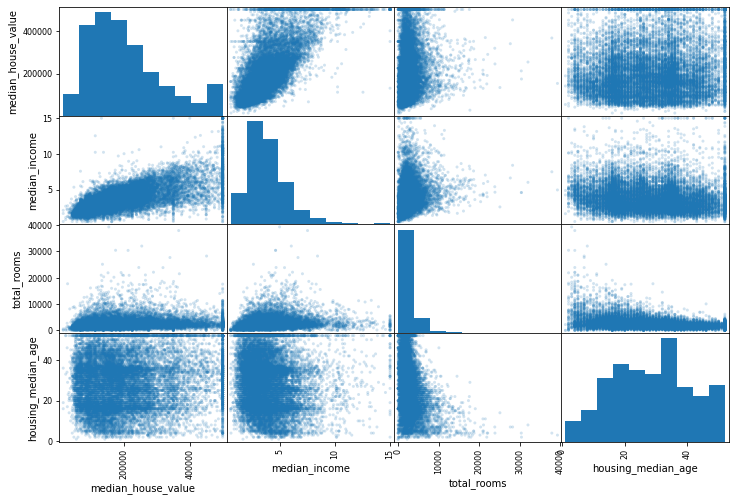

In [20]:
# 2. 숫자형 특성 사이에 산점도를 그려주는 판다스의 scatter_matrix 함수를 이용 -> 시각화해서 상관관계를 보자. 
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_train_cp[attributes], figsize=(12,8), alpha=0.2)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

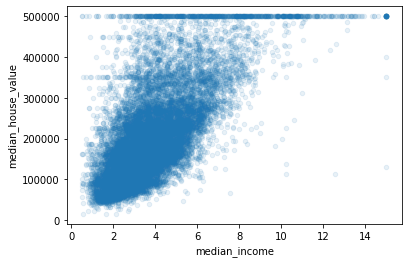

In [21]:
housing_train_cp.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
# 첫째, 양의 상관관계가 강하게 있어 보입니다.
# 가격 제한값이 수평선으로 잘 보이고, 이외에도 수평선이 2개정도 보입니다. 
# 알고리즘이 이런 이상한 형태를 학습하지 않도록 해당 관측치부분을 제거하는 것이 좋습니다.

## 3-3. 특성 조합으로 실험
ex ) "특정 구역의 총 방 개수" --> "가구당 방 개수" ; 한 가구에 방의 수가 얼마나 많은지 

ex ) "특정 구역의 총 침대 개수" --> "방 하나당 침대 개수" ; 방 하나에 침대가 얼마나 많은지

ex ) "특정 구역의 인구" --> "가구당 인구" ; 한 가구에 얼마나 많은 사람들이 사는지.. 

=> 파생 변수를 만들어 상관관계를 본다. 

In [22]:
housing_train_cp["rooms_per_household"] = housing_train_cp["total_rooms"]/housing_train_cp['households']
housing_train_cp["bedrooms_per_room"] = housing_train_cp["total_bedrooms"]/housing_train_cp["total_rooms"]
housing_train_cp["population_per_household"] = housing_train_cp["population"]/housing_train_cp["households"]

corr_matrix = housing_train_cp.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# rooms_per_household, bedrooms_per_room의 상관계수 절댓값이 파생전보다 조금 더 크다. 

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# 4. 데이터를 준비합니다.

In [23]:
housing_train_data = strat_train_set.drop("median_house_value", axis=1)
housing_train_labels = strat_train_set["median_house_value"].copy()
print(housing_train_labels)
housing_train_data

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [24]:
housing_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## 4-1. 데이터 정제(널처리 - imputation)
특성에 값이 없는 경우 이를 처리해주는 방법은 크게 3가지입니다.

1) 널 값을 가진 해당 관측치들을 제거합니다.

2) 널이 있는 피쳐를 삭제합니다.

3) 다른 값으로 대체합니다. (0, 평균, 중간값 등)

In [25]:
# 1)
# housing_train_data.dropna(subset=["total_bedrooms"])
# 2) 
# housing_train_data.drop("total_bedrooms", axis=1)
# 3) 
median = housing_train_data['total_bedrooms'].median()
housing_train_data["total_bedrooms"].fillna(median, inplace=True)

### SimpleImputer 객체 이용해서 널 값을 처리할 수도 있습니다.
##### 그리고 모든 수치형 특성에서 중앙값을 계산해 따로 저장해둘 수 있어 유용합니다.

In [26]:
from sklearn.impute import SimpleImputer

# SimpleImputer 객체 생성 - 널값을 중앙값으로 대체하는 임퓨터 생성
imputer = SimpleImputer(strategy = "median")

# 중간값은 수치형 특성(양적변수)에서만 계산되는 것이므로 텍스트 특성인 ocean_proximity를 제외한 데이터 복사본을 생성
housing_num = housing_train_data.drop("ocean_proximity", axis = 1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [27]:
imputer.fit(housing_num) # housing_num 데이터 프레임에 임퓨터를 적용합니다. (단, 실제로 변환은 하지 않음)

imputer.statistics_ # 각 특성의 중앙값을 계산해서 그 결과를 imputer 객체의 statistics_ 속성에 저장합니다. 

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [28]:
X = imputer.transform(housing_num) # 실제로 널값을 처리(변환)한 후 그 데이터를 변수에 담습니다. 
type(X) # 변환된 결과는 numpy array입니다.

# numpy array를 다시 판다스 데이터 프레임으로 만듭니다. 
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

In [29]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


## 4-2. 텍스트와 범주형 특성 다루기

In [30]:
housing_train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


['<1H OCEAN' 'NEAR OCEAN' 'INLAND' 'NEAR BAY' 'ISLAND']
<class 'numpy.ndarray'>


<AxesSubplot:>

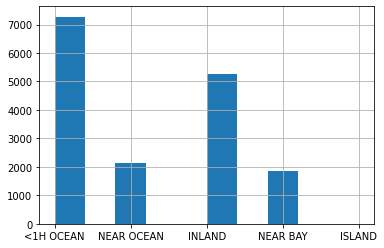

In [31]:
print(housing_train_data["ocean_proximity"].unique())
print(type(housing_train_data["ocean_proximity"].unique()))
housing_train_data["ocean_proximity"].hist()

In [32]:
housing_cat = housing_train_data[["ocean_proximity"]] # 이것은 시리즈(1차원)가 아니라 데이터프레임(2차원)!!!!!!!!!!!!
print(type(housing_cat)) 
housing_cat

<class 'pandas.core.frame.DataFrame'>


,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [33]:
# 라벨 인코더는 기본적으로 1차원인 어레이나 시리즈(1차원)를 핏, 트랜스폼하는 것으로 
# 반환값으로도 1차원의 어레이를 반환한다 -> 원핫 인코더의 입력값은 2차원이어야 하므로 라벨인코더의 결과값을 원핫인코더에 넣을 수는 없다.

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(housing_cat)
# print(le.classes_)

# housing_cat_encoded = le.transform(housing_cat)
# housing_cat_encoded 

# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat_encoded)
# housing_cat_1hot

### 1) OrdinalEncoder - 순서형 변수에 이용! 

In [34]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [35]:
ordinal_encoder.categories_ # OrdinalEncoder객체의 인스턴스 속성 categories_에 범주의 정보가 담겨있다. 

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
# 하지만 ocean_proximity 피쳐는 순서의 의미가 있는 변수가 아니므로 원핫인코딩(범주마다 컬럼 따로 빼기)을 해야 한다.

### 2) OneHotEncoder - 순서의 의미가 없는 범주형 변수에 이용!

In [37]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [38]:
print(cat_encoder.categories_)
pd.DataFrame(housing_cat_1hot.toarray()) 

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,0.0,1.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0
16509,0.0,1.0,0.0,0.0,0.0
16510,1.0,0.0,0.0,0.0,0.0


## 4-3. 특성 스케일링(feature scaling)
피쳐들의 스케일이 같아야지만 잘 작동하는 알고리즘들이 있다.

단, 타깃값에 대한 스케일링을 일반적으로 불필요하다. 

## Cf) 나만의 변환기(클래스, 객체) 만들기 & 변환 파이프라인 이용 

1) 파생변수를 테이블에 추가하는 작업을 하는 변환기 만들기

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
# TransformerMixmin : fit_transform() 메서드를 가지고 있으며 이를 상속하는 모든 파이썬 클래스에 이 메서드를 제공
# BaseEstimator : 변환기, 추정기라면 당연히 가져야할 메서드인 get_params()와 set_params()를 가지는 클래스 -> 하이퍼파라미터 튜닝에 필요


# 파생변수를 테이블에 추가하는 작업을 하는 변환기이다. 
# room_per_household와 population_per_household 파생 변수는 확실히 만들 것이고, 
# bedrooms_per_room는 만드는 것이 알고리즘에 도움이 될지 말지 잘 모르겠어서 하이퍼파라미터로 설정할 수 있게 한 것이다. 
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6 

class CombinedAttributesAdder(BaseEstimator, TransformerMixin) :
    def __init__(self, add_bedrooms_per_room = True) :
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X) :
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix]/ X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else : 
            return np.c_[X, rooms_per_household, population_per_household]
        

attribute_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attribute_adder.transform(housing_train_data.values) 
# 데이터 프레임이 아니라 이차원 넘파이 어레이를 넣어주어야 한다!!!!!!!!!!!!!!!!!!

In [40]:
housing_train_data.values # values : 테이블을 2차원 넘파이 어레이로 변환한 것을 가지고 있는 속성 

array([[-121.89, 37.29, 38.0, ..., 339.0, 2.7042, '<1H OCEAN'],
       [-121.93, 37.05, 14.0, ..., 113.0, 6.4214, '<1H OCEAN'],
       [-117.2, 32.77, 31.0, ..., 462.0, 2.8621, 'NEAR OCEAN'],
       ...,
       [-116.4, 34.09, 9.0, ..., 765.0, 3.2723, 'INLAND'],
       [-118.01, 33.82, 31.0, ..., 356.0, 4.0625, '<1H OCEAN'],
       [-122.45, 37.77, 52.0, ..., 639.0, 3.575, 'NEAR BAY']],
      dtype=object)

In [41]:
pd.DataFrame(housing_extra_attribs)

,0,1,2,3,4,5,6,7,8,9,10
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785
...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.2,46,1271,236,573,210,4.9312,INLAND,6.05238,2.72857
16508,-117.56,33.88,40,1196,294,1052,258,2.0682,INLAND,4.63566,4.07752
16509,-116.4,34.09,9,4855,872,2098,765,3.2723,INLAND,6.34641,2.74248
16510,-118.01,33.82,31,1960,380,1356,356,4.0625,<1H OCEAN,5.50562,3.80899


2) 변환 파이프라인 만들기

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num.values)

In [43]:
print(housing_num.values)
housing_num.values.ndim

[[-121.89     37.29     38.     ...  710.      339.        2.7042]
 [-121.93     37.05     14.     ...  306.      113.        6.4214]
 [-117.2      32.77     31.     ...  936.      462.        2.8621]
 ...
 [-116.4      34.09      9.     ... 2098.      765.        3.2723]
 [-118.01     33.82     31.     ... 1356.      356.        4.0625]
 [-122.45     37.77     52.     ... 1269.      639.        3.575 ]]


2

In [44]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # 열이름을 리스트에 담아놓은 것(리스트 객체)
print(list(housing_num))
cat_attribs =['ocean_proximity']

# 수치형 피쳐는 num_pipeline을 사용해 변환하고, 범주형 피쳐는 원핫인코딩을 하는 ColumnTransformer 객체를 만든다. 
full_pipeline = ColumnTransformer([
    ('num_transform', num_pipeline, num_attribs),
    ('cat_transform', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing_train_data)

housing_prepared # 데이터 프레임을 넣었지만 결과는 넘파이 어레이이다.

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [45]:
print(list(housing_train_data['ocean_proximity'].unique()))
col = list(housing_num)+['rooms_per_household', 'population_per_household', 'bedrooms_per_room']+list(housing_train_data['ocean_proximity'].unique())
col

['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND']


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'bedrooms_per_room',
 '<1H OCEAN',
 'NEAR OCEAN',
 'INLAND',
 'NEAR BAY',
 'ISLAND']

In [46]:
pd.DataFrame(housing_prepared,columns=col)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,NEAR OCEAN,INLAND,NEAR BAY,ISLAND
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755,-0.428853,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689,0.491503,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554,-0.521776,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509,-0.303407,1.0,0.0,0.0,0.0,0.0


# 5. 적당한 몇 개의 후보 모델을 고르고 학습/평가

## 5-1. 훈련세트(훈련+검증)에서 훈련하고 평가하기

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_train_labels)

LinearRegression()

In [48]:
# 훈련 세트의 일부를 뽑아서 예측해봄
some_data = housing_train_data.iloc[:5]
some_labels = housing_train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측 : ", lin_reg.predict(some_data_prepared))
print("레이블 : ", list(some_labels))

예측 :  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
레이블 :  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [49]:
# 전체 훈련 세트에 대한 이 회귀 모델의 RMSE를 측정
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_train_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [50]:
# 모델이 훈련데이터에 과소적합되어 있다는 것을 알 수 있다. 
# -> 방법 1 ) 좋은 특성을 새로 주입하거나 
# -> 방법 2 ) 더 강력한 모델을 써본다. 

# 방법 2를 써보기로 하자.
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_train_labels)

DecisionTreeRegressor()

In [51]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_train_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
# 오차가 하나도 없는 것을 보니 훈련 데이터에 모델이 과대적합된 것으로 보인다. 
# 진짜 과대적합인지 이제 검증을 해보자

0.0

## 5-2. 교차 검증을 사용한 평가 (훈련세트로 모델을 검증)

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_train_labels, scoring = "neg_mean_squared_error", cv=10)
# 사이킥런의 교차검증 기능은 scoring 매개변수에 (낮은 값일 수록 좋은) 비용함수가 아니라 (큰 값일 수록 좋은) 효용함수를 기대합니다.
# 따라서 평균제곱오차(MSE)에 (-)부호를 붙인 값을 계산하는 neg_mean_squared_error 함수를 사용한 것입니다. 
# 또한 계산된 scores값은 음수이기 때문에 루트를 취하기 전에 (-)부호를 붙이는 것입니다.

In [53]:
# 결정 트리 모델로 교차검증해보기
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores) : 
    print("점수 : ", scores)
    print("평균 : ", scores.mean())
    print("표준 편차 : ", scores.std())
    
display_scores(tree_rmse_scores) # scores는 비용함수인 MSE이므로 작을수록 모델 성능이 좋은 것입니다

점수 :  [68766.95171357 67740.71810508 69739.34722304 68958.33468311
 69782.91660279 76038.70688858 71188.71626515 71308.02981074
 75720.49327095 69768.38552106]
평균 :  70901.26000840655
표준 편차 :  2684.58295075072


In [54]:
# 선형 회귀 모델로 검증해보기
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_train_labels, scoring = "neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수 :  [66769.90632832 66965.03044759 70347.95244419 74742.46763773
 68031.13388938 71210.34397633 64968.20598214 68275.41168504
 71552.91566558 67660.93461663]
평균 :  69052.43026729292
표준 편차 :  2734.867961268676


In [55]:
#랜덤 포레스트 회귀 모델로 검증해보기
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_train_labels)

RandomForestRegressor()

In [56]:
forest_reg.score(housing_prepared, housing_train_labels) # 가장 성능이 좋아 보입니다.

0.9740111484698867

In [57]:
import joblib

joblib.dump(forest_reg, "ch02_model.pkl")
# my_model_loaded = joblib.load("ch02_model.pkl")

['ch02_model.pkl']

# 6. 시스템을 세밀하게 튜닝합니다.

## 6-1. 그리드 탐색(Grid search)
최적의 파라미터 조합을 찾습니다.

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10, 30], 'max_features':[2,4,6,8]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features':[2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [59]:
# 최적의 파라미터를 보자 (최적의 파라미터를 가진 모델이 best_estimator_ 속성에 들어있다.)
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [60]:
# 평가 점수를 확인합니다.
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)
# mean_score는 비용함수인 오차 제곱의 평균에 루트를 씌운 것이므로 작을 수록 좋다. 
# 파라미터가 {'max_features': 8, 'n_estimators': 10} 일 때가 가장 작은 값인 49687.96483419168를 갖는다.
    
pd.DataFrame(cvres)

63483.26655398287 {'max_features': 2, 'n_estimators': 3}
55732.87369945283 {'max_features': 2, 'n_estimators': 10}
52824.95172084497 {'max_features': 2, 'n_estimators': 30}
60689.492608732864 {'max_features': 4, 'n_estimators': 3}
53080.560693885505 {'max_features': 4, 'n_estimators': 10}
50319.772833654555 {'max_features': 4, 'n_estimators': 30}
58383.0288470614 {'max_features': 6, 'n_estimators': 3}
52221.133876338696 {'max_features': 6, 'n_estimators': 10}
50178.89752223426 {'max_features': 6, 'n_estimators': 30}
59676.3261077131 {'max_features': 8, 'n_estimators': 3}
51777.869260447755 {'max_features': 8, 'n_estimators': 10}
49687.96483419168 {'max_features': 8, 'n_estimators': 30}
63260.067477475655 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54668.97895832676 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59468.367316678494 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52611.84855781177 {'bootstrap': False, 'max_features': 3, 'n_estimators

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.118630,0.013674,0.006669,0.000946,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.941504e+09,-4.559696e+09,...,-4.030125e+09,3.111917e+08,18,-1.154810e+09,-1.138902e+09,-1.109269e+09,-1.088043e+09,-1.007160e+09,-1.099637e+09,5.170081e+07
1,0.446554,0.124612,0.020209,0.004254,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.890714e+09,-3.211183e+09,...,-3.106153e+09,1.621411e+08,11,-6.004092e+08,-5.793720e+08,-5.696633e+08,-5.829239e+08,-5.789464e+08,-5.822629e+08,1.007801e+07
2,1.224785,0.065576,0.052621,0.004128,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.557667e+09,-2.930306e+09,...,-2.790476e+09,1.518690e+08,8,-4.301254e+08,-4.329141e+08,-4.169505e+08,-4.539427e+08,-4.328663e+08,-4.333598e+08,1.186444e+07
3,0.202009,0.022847,0.006551,0.000373,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.472317e+09,-3.629222e+09,...,-3.683215e+09,1.302400e+08,16,-9.984137e+08,-9.329046e+08,-9.984763e+08,-9.655002e+08,-9.423295e+08,-9.675249e+08,2.738460e+07
4,0.659419,0.039912,0.021419,0.004910,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.620333e+09,-2.807776e+09,...,-2.817546e+09,1.357961e+08,9,-5.371766e+08,-5.011593e+08,-5.335046e+08,-5.425823e+08,-5.071760e+08,-5.243198e+08,1.681366e+07
5,1.913763,0.034643,0.054264,0.002585,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.373345e+09,-2.599653e+09,...,-2.532080e+09,1.433817e+08,3,-4.080152e+08,-3.812777e+08,-3.942254e+08,-3.850547e+08,-3.857425e+08,-3.908631e+08,9.563865e+06
6,0.276504,0.015662,0.007125,0.001579,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.130560e+09,-3.393402e+09,...,-3.408578e+09,1.541988e+08,13,-9.032649e+08,-8.903334e+08,-9.072985e+08,-1.010413e+09,-9.062340e+08,-9.235089e+08,4.387262e+07
7,0.894414,0.033425,0.021536,0.002067,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.573999e+09,-2.890070e+09,...,-2.727047e+09,1.475130e+08,6,-5.095720e+08,-5.155487e+08,-5.050522e+08,-5.126572e+08,-4.848050e+08,-5.055270e+08,1.092943e+07
8,2.663080,0.073409,0.053682,0.003056,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.307789e+09,-2.621790e+09,...,-2.517922e+09,1.459454e+08,2,-3.879107e+08,-3.856996e+08,-3.801098e+08,-3.782078e+08,-3.781584e+08,-3.820172e+08,4.033170e+06
9,0.382390,0.037649,0.007972,0.002186,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.312175e+09,-3.448237e+09,...,-3.561264e+09,1.817301e+08,15,-9.026628e+08,-9.304274e+08,-9.348492e+08,-9.190812e+08,-8.688404e+08,-9.111722e+08,2.390943e+07


In [61]:
# 하이퍼파라미터를 잡을 때, 범위의 감이 없는 상태라면, 
# 그리드서치를 할 때, 임의의 하이퍼파라미터를 설정해보는 RandomizedSearchCV를 이용할 수 있다.
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'n_estimators': [3,10, 30], 'max_features':[2,4,6,8]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features':[2,3,4]}
]
forest_reg = RandomForestRegressor()
random_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_iter=5)

random_search.fit(housing_prepared, housing_train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
random_search.best_estimator_ # 하이퍼파라미터 조합을 임의로 뽑는 횟수(n_iter)를 작게 설정해놓아서 결과를 신뢰하기는 힘들 것..

RandomForestRegressor(max_features=6, n_estimators=10)

## 6-2. 앙상블 방법
최상의 모델을 연결

## 6-3.최상의 모델을 가지고 분석
특성의 상대적 중요도를 보자.

In [63]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.30817806e-02, 6.49122199e-02, 4.30156767e-02, 1.59907989e-02,
       1.54438921e-02, 1.54661535e-02, 1.46968937e-02, 3.68366162e-01,
       4.58726449e-02, 1.09331512e-01, 7.09018564e-02, 8.50843137e-03,
       1.47850880e-01, 2.52826808e-05, 2.50935093e-03, 4.02646472e-03])

In [64]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat_transform']

In [65]:
cat_encoder

OneHotEncoder()

In [66]:
print(cat_encoder.categories_) # 리스트 안에 어레이가 들어간 것
cat_encoder.categories_[0] # 따라서 안에 있는 요소를 인덱싱으로 뽑아줘야 한다.

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [67]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [68]:
sorted(zip(feature_importances, attributes), reverse = True) #reverse = True : 내림차순 정렬

[(0.368366161899358, 'median_income'),
 (0.14785087982926934, 'INLAND'),
 (0.10933151196171291, 'pop_per_hhold'),
 (0.07308178061552151, 'longitude'),
 (0.07090185639294358, 'bedrooms_per_room'),
 (0.0649122198714784, 'latitude'),
 (0.045872644868562906, 'rooms_per_hhold'),
 (0.043015676719268515, 'housing_median_age'),
 (0.01599079891113354, 'total_rooms'),
 (0.015466153476241667, 'population'),
 (0.015443892092229728, 'total_bedrooms'),
 (0.01469689365500577, 'households'),
 (0.008508431370202638, '<1H OCEAN'),
 (0.004026464724687996, 'NEAR OCEAN'),
 (0.002509350931535272, 'NEAR BAY'),
 (2.5282680848264834e-05, 'ISLAND')]

## 6-4. 테스트 세트로 시스템 평가
※ 단 테스트 세트에서 훈련하면 안되므로 fit_transform()이 아니라 transform()을 호출해야 합니다!

In [70]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47815.567565356534

In [73]:
# 일반화 오차(RMSE)의 신뢰구간을 보자. 
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1 ,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45859.38520991, 49694.80648281])

# 7. 론칭, 모니터링, 시스템 유지 보수